In [63]:
import folium
import ee
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as disp
from branca.element import Figure
import numpy as np
import geemap.core as geemap

In [3]:
fig1 = Figure(width=550,height=350)

place = [-25.767765, 27.821752]

map1 = folium.Map(location=place,zoom_start=12, width=550,height=350);
fig1.add_child(map1)

folium.Marker(location=place,popup='Default popup Marker1',tooltip='Click here to see Popup').add_to(map1)
display(fig1)

Folium is a Python library specifically designed for creating interactive web maps.

The coordinates of the area of interest generated with https://geojson.io/.

In [4]:
area = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              27.786133463075856,
              -25.75962922338192
            ],
            [
              27.83496591736119,
              -25.771439844456808
            ],
            [
              27.873019288371523,
              -25.775021668711503
            ],
            [
              27.906776882033,
              -25.754303403348942
            ],
            [
              27.877614848722516,
              -25.729469674356395
            ],
            [
              27.786133463075856,
              -25.75962922338192
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

In [5]:
folium.GeoJson(data=area,style_function=lambda x: {'fillColor': 'orange'}).add_to(map1);
display(fig1)

In [6]:
ee.Authenticate()

You need a GCP (google cloud platform) project with earth engine enabled.

https://earthengine.google.com/noncommercial/

https://console.cloud.google.com/

In [7]:
ee.Initialize(project="model-argon-418411")

In [8]:
coords = area['features'][0]['geometry']['coordinates']
aoi = ee.Geometry.Polygon(coords)

In [9]:
image1 = ee.ImageCollection('COPERNICUS/S1_GRD').filterBounds(aoi).filterDate('2024-01-01', '2024-01-31').first().clip(aoi);
image2 = ee.ImageCollection('COPERNICUS/S1_GRD').filterBounds(aoi).filterDate('2023-08-01', '2023-08-31').first().clip(aoi);

In [24]:
url = image1.select('VV').getThumbURL({'min': -20, 'max': 0})
disp.Image(url=url, width=800)

In [25]:
url = image2.select('VV').getThumbURL({'min': -20, 'max': 0})
disp.Image(url=url, width=800)

In [55]:
image1 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA').filterBounds(aoi).filterDate('2019-12-01', '2020-01-31').first();
image2 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA').filterBounds(aoi).filterDate('2020-08-01', '2020-08-31').first();

In [56]:
region = ee.Geometry.Polygon(area['features'][0]['geometry']['coordinates'])

In [57]:
def display_histogram(image, region):

  # Compute NDVI for the specified region.
  ndvi = image.normalizedDifference(['B5', 'B4']).clip(region)

  # Convert the image to an array so it can be plotted.
  ndvi_array = ndvi.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=region,
    maxPixels=1e10
  ).get('nd').getInfo()

  # Plot the histogram of NDVI values.
  import matplotlib.pyplot as plt
  plt.hist(ndvi_array, bins=100)
  plt.xlabel('NDVI Value')
  plt.ylabel('Frequency')
  plt.show()

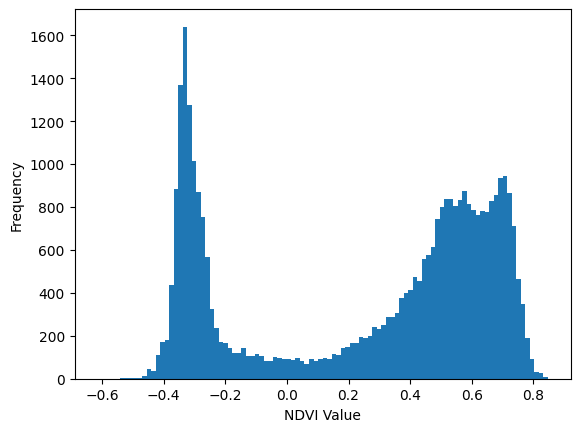

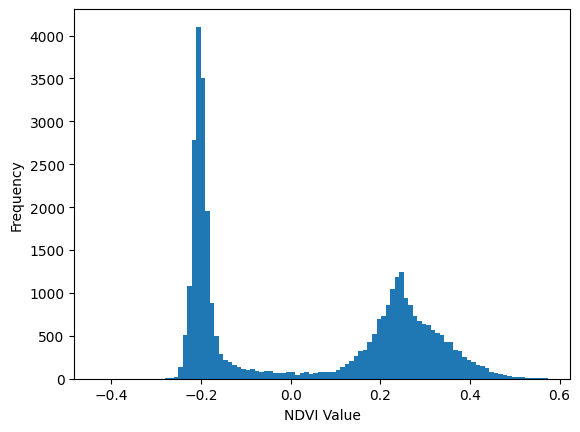

In [59]:
display_histogram(image1, region)
display_histogram(image2, region)

In [68]:
# Define the visualization parameters.
image_viz_params = {
    'bands': ['B5', 'B4'],
    'min': 0,
    'max': 0.5,
    'gamma': [0.95, 1.1],
}

map = geemap.Map(center=place, zoom=10)

# Add the image layer to the map and display it.
map.add_layer(image1, image_viz_params, 'false color composite')
display(map)

Map(center=[-25.767765, 27.821752], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [18]:
import datetime
# Define the location of interest.
#location = ee.Geometry.Point().buffer(10000).bounds();

sentinel1 = ee.ImageCollection('COPERNICUS/S1_GRD')\
.filterBounds(aoi).filterDate('2022-01-01', '2024-02-29')\
.sort('system:time_start', False);

# Print the number of images in the filtered collection.
print('Number of images:', sentinel1.size().getInfo())

Number of images: 64


In [19]:
dates = sentinel1.aggregate_array("system:time_start").getInfo()

# Convert the dates from Unix time to human-readable format
readable_dates = [datetime.datetime.fromtimestamp(int(d) / 1000).strftime("%Y-%m-%d") for d in dates]

print("Available dates:", readable_dates)

Available dates: ['2024-02-23', '2024-02-11', '2024-01-30', '2024-01-18', '2024-01-06', '2023-12-25', '2023-12-13', '2023-12-01', '2023-11-19', '2023-11-07', '2023-10-14', '2023-10-02', '2023-09-20', '2023-09-08', '2023-08-27', '2023-08-15', '2023-08-03', '2023-07-22', '2023-07-10', '2023-06-28', '2023-06-16', '2023-06-04', '2023-05-23', '2023-05-11', '2023-04-29', '2023-04-17', '2023-04-05', '2023-03-24', '2023-03-12', '2023-02-28', '2023-02-16', '2023-02-04', '2023-01-23', '2023-01-11', '2022-12-30', '2022-12-18', '2022-12-06', '2022-11-24', '2022-11-12', '2022-10-31', '2022-10-19', '2022-10-07', '2022-09-25', '2022-09-13', '2022-09-01', '2022-08-20', '2022-08-08', '2022-07-27', '2022-07-15', '2022-07-03', '2022-06-21', '2022-05-28', '2022-05-16', '2022-05-04', '2022-04-22', '2022-04-10', '2022-03-29', '2022-03-17', '2022-03-05', '2022-02-21', '2022-02-09', '2022-01-28', '2022-01-16', '2022-01-04']


In [20]:
images = sentinel1.toList(sentinel1.size().getInfo())
time_series = [];
# Loop through each image in the 140 images
for i in range(sentinel1.size().getInfo()):
    # Get the date of the selected image
    image = ee.Image(images.get(i))
    date = image.date().format("YYYY-MM-dd").getInfo()
    value = image.reduceRegion(ee.Reducer.mean(), aoi, 30).getInfo();
    time_series.append([date,value['VV'],value['VH']]);

In [21]:
import pandas as pd
df = pd.DataFrame(time_series, columns=["date", "VV", "VH"])

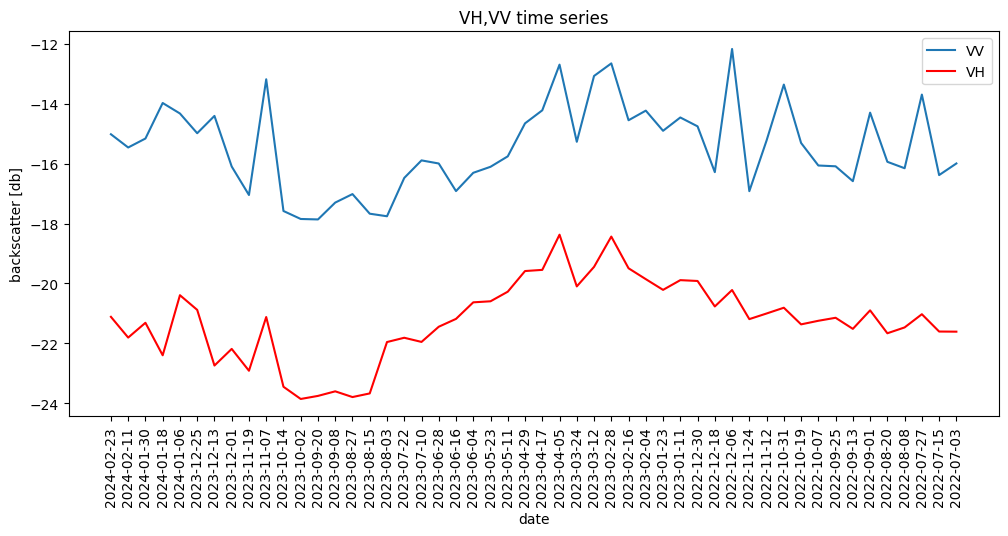

In [22]:
fig1, ax = plt.subplots(1,1,dpi=100,figsize=(12, 5))
ax.plot(df['date'][0:50],df['VV'][0:50],label='VV');
ax.plot(df['date'][0:50],df['VH'][0:50],'r',label='VH');
ax.tick_params(axis='x', labelrotation = 90)
ax.set_title('VH,VV time series');
ax.set_xlabel('date')
ax.set_ylabel('backscatter [db]');
ax.legend()

Resources:


https://developers.google.com/earth-engine/guides/auth

https://www.kaggle.com/code/sathyanarayanrao89/google-earth-sentinel-1-imagery-eda-on-berambadi